<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [37]:
import scipy.stats as stats

#### Read the dataset in the csv file from the URL


In [16]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(URL)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [21]:
#1 For the "Median value of owner-occupied homes" provide a boxplot

In [22]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


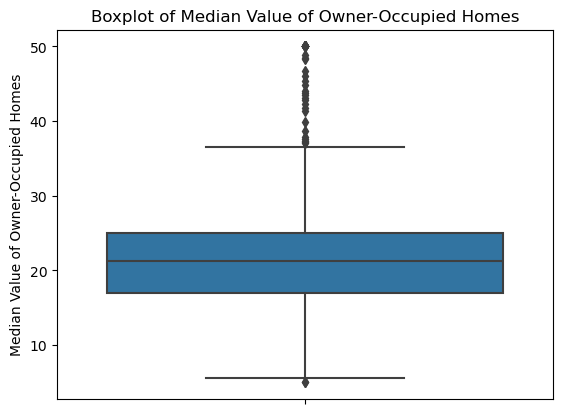

In [20]:
ax = sns.boxplot(y='MEDV', data=boston_df)
pyplot.ylabel('Median Value of Owner-Occupied Homes')
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes')
pyplot.show()

In [ ]:
#2 Provide a  bar plot for the Charles river variable

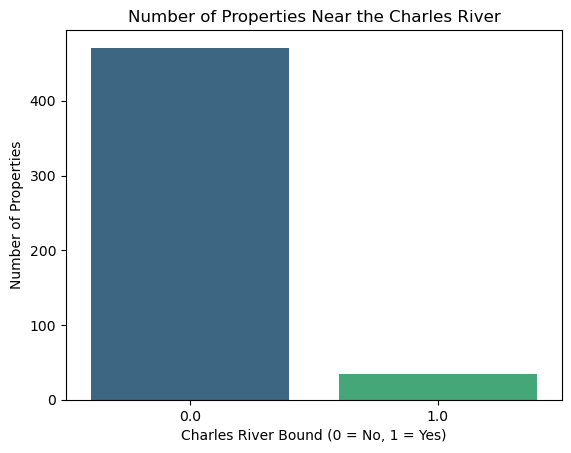

In [26]:
charles_river_counts = boston_df['CHAS'].value_counts()
sns.barplot(x=charles_river_counts.index, y=charles_river_counts.values, palette='viridis')
# Adding labels and title
pyplot.xlabel('Charles River Bound (0 = No, 1 = Yes)')
pyplot.ylabel('Number of Properties')
pyplot.title('Number of Properties Near the Charles River')

# Show the plot
pyplot.show()

In [29]:
#3 Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

bins = [0, 35, 70, boston_df['AGE'].max()]
labels = ['35 years and younger', 'Between 35 and 70 years', '70 years and older']
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=False)

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


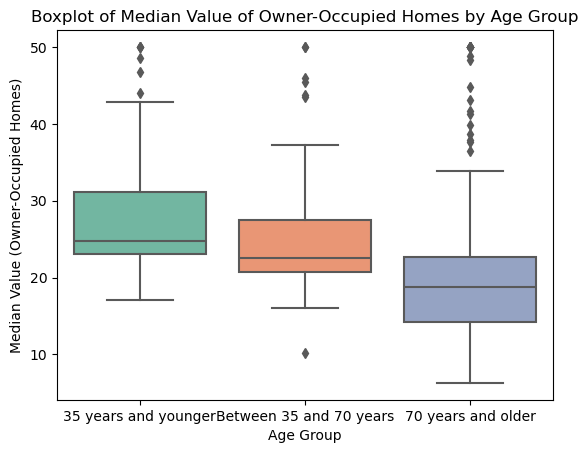

In [33]:
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df, palette='Set2')

# Adding labels and title
pyplot.xlabel('Age Group')
pyplot.ylabel('Median Value (Owner-Occupied Homes)')
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes by Age Group')

# Show the plot
pyplot.show()

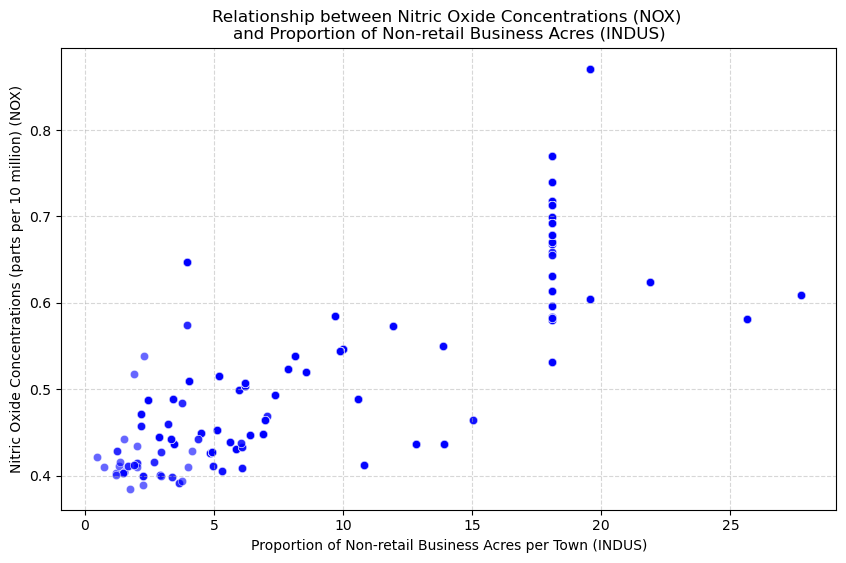

In [32]:
INDUS = boston_df['INDUS']
NOX = boston_df['NOX']

pyplot.figure(figsize=(10, 6))
pyplot.scatter(INDUS, NOX, color='blue', alpha=0.6, edgecolors='w', linewidth=0.5)
pyplot.title('Relationship between Nitric Oxide Concentrations (NOX) \nand Proportion of Non-retail Business Acres (INDUS)')
pyplot.xlabel('Proportion of Non-retail Business Acres per Town (INDUS)')
pyplot.ylabel('Nitric Oxide Concentrations (parts per 10 million) (NOX)')
pyplot.grid(True, linestyle='--', alpha=0.5)
pyplot.show()

 While the general trend is positive, the spread of the data points suggests that other factors might also influence Nitric oxide concentrations. Some towns with similar industrial proportions have different NOX levels, indicating the potential influence of other variables such as traffic, regulations, or the presence of green spaces.

# Create a histogram for the pupil to teacher ratio variable
# Extract the PTRATIO column
PTRATIO = boston_df['PTRATIO']

# Create the histogram
pyplot.hist(PTRATIO, bins=15, color='green', edgecolor='black', alpha=0.7)
pyplot.title('Distribution(PTRATIO)')
pyplot.xlabel('Pupil-to-Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.grid(True, linestyle='--', alpha=0.5)
pyplot.show()


# Task 2

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [39]:
bounded_by_river = boston_df[boston_df['CHAS'] == 1]['MEDV']  # Houses bounded by the Charles River
not_bounded_by_river = boston_df[boston_df['CHAS'] == 0]['MEDV']  # Houses not bounded by the Charles River

# Perform the t-test for independent samples
t_stat, p_value = stats.ttest_ind(bounded_by_river, not_bounded_by_river, equal_var=False)

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 3.113291312794837
P-value: 0.003567170098137517


We see that P-value = 0.003.. < 0.05. Therefore,there is a significant difference in the median value of houses bounded by the Charles River compared to those not bounded by the river.

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [41]:
bins = [0, 35, 70, 100]  # Example bin edges
labels = ['Low', 'Medium', 'High']
boston_df['AGE_cat'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, include_lowest=True)

# Group the data by the AGE categories and get MEDV values for each group
low_age = boston_df[boston_df['AGE_cat'] == 'Low']['MEDV']
medium_age = boston_df[boston_df['AGE_cat'] == 'Medium']['MEDV']
high_age = boston_df[boston_df['AGE_cat'] == 'High']['MEDV']

# Perform ANOVA
f_stat, p_value = stats.f_oneway(low_age, medium_age, high_age)

# Print the results
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15


Fail to reject the null hypothesis, indicating no significant difference in house prices across the AGE categories.

Based on the ANOVA test results, we reject the null hypothesis that there is no difference in the median values of houses (MEDV) across the different categories of the proportion of owner-occupied units built prior to 1940 (AGE).

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [44]:
from scipy.stats import pearsonr 

In [45]:
corr_coefficient, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Print the results
print(f"Pearson Correlation Coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.7636514469209149
P-value: 7.913361061242812e-98


There is a statistically significant and strong positive relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. This suggests that towns with a higher proportion of industrial or non-retail business areas tend to have higher concentrations of Nitric oxide, which is consistent with expectations regarding industrial pollution.

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [48]:
# Define the dependent and independent variables
X = boston_df[['DIS']]
y = boston_df['MEDV']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Coefficient of DIS: {model.coef_[0]}")

Mean Squared Error: 67.95691932803946
Coefficient of DIS: 1.0295093986065034


each additional unit increase in the weighted distance to the five Boston employment centers, the median value of owner-occupied homes (MEDV) increases by approximately $1,030. This suggests a positive relationship between the distance to employment centers and the median value of homes in this case.

An MSE of 67.96 indicates the average squared difference between the observed and predicted values. While this value helps assess the model's accuracy, its interpretation in terms of goodness-of-fit requires comparison with other models or additional context (like standard deviation of MEDV)